Dans ce TP, le but est d'implémenter l'algorithme de PCA sur la base de données MNIST. 
On veut réduire nos données dans un espace de dimension 2 pour pouvoir visualiser cet espace par la suite. 

La première partie du TP consiste à récuperer le dataset MNIST et afficher une image. Reprenez votre code du TP2 pour cela.

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pylab as plt
from scipy.linalg import eigh

## Mnist

Executer la cellule suivante pour récupérer le dataset. La variable qui contient le dataset est nommé mnist. 

In [2]:
mnist = datasets.load_digits()

Utiliser la fonction imshow de matplotlib (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) pour afficher une image du dataset. 
Il faudra transformer un vecteur de la base de données en matrice. 

In [4]:
def vectenmat(v):
    a=np.zeros([8,8])
    for i in range(8):
      a[i,:]=v[i*8:i*8+8]
    return a


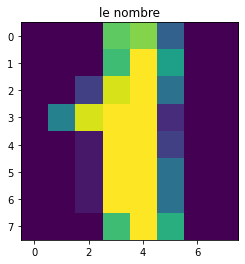

In [5]:
A=vectenmat(mnist.data[1])
plt.imshow(vectenmat(mnist.data[1]))
plt.title('le nombre')
plt.show()

Stocker vos données dans une variable db. 

In [15]:
db=mnist.data
print(db)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


## PCA

Il faut d'abord centrer et réduire nos données (c'est-à-dire faire en sorte qu'elles aient une moyenne nulle et un ecart typ de 1. 

Donner le code python nécessaire pour centrer et réduire votre variable db. 
Stocker vos données stockées et réduites dans une matrice standard_db.

In [8]:
ndb=(db-np.mean(db))/(np.std(db)+1e-8)

Vérifier que standard_db a une moyenne nulle (ou proche) et un ecart type de 1 (ou proche)

In [13]:
print('la moyenne', np.mean(ndb), "l'ecart type", np.std(ndb))

la moyenne -2.638092551557829e-17 l'ecart type 0.9999999983379836


On va utiliser la fonction cov de numpy (https://numpy.org/doc/stable/reference/generated/numpy.cov.html) pour calculer la matrice de covariance de nos données. 

Quelles sont les variables dont on veut mesurer la covariance dans notre cas ? 
Quelles doivent être les dimensions de cette matrice de covariance ? 

Réponse :les pixels (colonnes de notre matrices) 
la matrice de covarience doit etre de taille 64 par 64 **texte en gras**

Donner le code python permettant de calculer la matrice de covariance. Vérifier sa taille. 

In [19]:
co=np.cov(ndb,rowvar=False)
np.shape(co)

(64, 64)

On utilise la fonction eigh de scipy (https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eigh.html) qui renvoie un tuple formé des valeurs propres et vecteurs propres. 

Calculer les valeurs propres et vecteurs propres de la matrice de covariance. 

In [25]:
(valeurs_propres , vecteurs_propres)=eigh(co)
print(vecteurs_propres)

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -7.32744001e-14  2.55351296e-15 ... -1.83420720e-02
   1.01064569e-02 -1.73094651e-02]
 [ 0.00000000e+00 -1.31751374e-15 -3.27898953e-16 ... -1.26475543e-01
   4.90849204e-02 -2.23428835e-01]
 ...
 [ 0.00000000e+00  6.15879310e-15 -5.92408067e-16 ... -2.32084163e-01
  -1.76697117e-01 -8.94184677e-02]
 [ 0.00000000e+00 -1.63395425e-15 -4.51028104e-17 ... -1.67026563e-01
  -1.94547053e-02 -3.65977111e-02]
 [ 0.00000000e+00  5.63358360e-15  1.66533454e-16 ... -3.48043832e-02
   6.69693895e-03 -1.14684954e-02]]


Il faut maintenant récupérer les indices des plus grandes valeurs propres. 
Utiliser la fonction argsort de numpy pour cela (https://numpy.org/doc/stable/reference/generated/numpy.argsort.html)

In [23]:
np.argsort(valeurs_propres)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])

On veut un espace réduit de dimension 2. 
Combien de valeurs propres allons-nous selectionner ?

Réponse :

**nous allons selectioner deux valeurs propres celles d'indices 62 et 63.**

Récupérez maintenant les vecteurs propres associés aux deux plus grandes valeurs propres dans une variable vectors. 


In [33]:
v=vecteurs_propres[62:64]

Quelles doit être la taille de la matrice vectors (contenant les deux vecteurs propres sélectionnés) ? 

Réponse : 

2 vecteurs de 64 donc la taille sera 2 fois 64

Vérifier que la taille de vector est correcte. 

In [34]:
np.shape(v)

(2, 64)

Projeter maintenant vos données dans le nouvel espace, en multipliant vos données par la matrice de passage que vous venez de calculer. 
Appelez new_coordinates vos nouvelles coordonnées. 

In [37]:
    projection=np.matmul(db,np.transpose(v))
    print(projection)

[[-10.50533194   9.68823713]
 [ -9.99667387   3.53626765]
 [ -3.87229144  14.21935712]
 ...
 [-12.21317656  14.28737524]
 [-22.92342515   5.38423364]
 [-16.13318349  12.26680642]]


Quelle doit être la taille de vos nouvelles coordonnées ? 

In [38]:
np.shape(projection)

(1797, 2)

Réponse : 

Quelle est la variance expliquée par cette projection ? (Donner du code python pour répondre).

In [39]:
varexpli1=valeurs_propres[62]/np.sum(valeurs_propres)
varexpli2=valeurs_propres[63]/np.sum(valeurs_propres)
print("la 1ere variancee expliquée",varexpli1 , "la 2eme" , varexpli2)

la 1ere variancee expliquée 0.13618771239635433 la 2eme 0.14890593584063835


## Visualisation 

Utiliser la fonction scatter pour visualiser vos données réduites par PCA. 
Colorer les points en fonction des labels dans la base de données. 

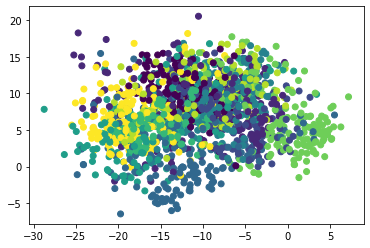

In [44]:
plt.scatter(projection[:,0] , projection[:,1] , c=mnist.target)

Que remarque-t-on ?

Réponse : 